# Business Understanding

## Background

text

<h3><center>Features</center></h3>


|    **Variable**   	|                                    **Description**                                   	| **Unit** 	|
|:-----------------:	|:------------------------------------------------------------------------------------:	|:--------:	|
|   dswrf_sfc_wm2   	| Net Downward Shortwave Radiation Flux                                                	|  [W/m^2] 	|
|    gust_sfc_ms    	| Wind Gust Surface                                                                    	|   [m/s]  	|
|     hpbl_sfc_m    	| Planetary Boundary Layer Height                                                      	|    [m]   	|
|     msl_ms_pa     	| Mean Sea Level Pressure                                                              	|   [Pa]   	|
| pottemp_80mto0m_K 	| Potential Temperature Difference between 80m and 0m                                  	|    [K]   	|
|       q_2m_1      	| Specific Humidity in 2m height                                                       	|    [-]   	|
|     q_pfg30_1     	| Specific Humidity Mean over first 30 hPa (~250m)                                     	|    [-]   	|
|      rpl925%      	| Relative Humidity in 925 hPa pressure level                                          	|    [%]   	|
|      rpl950%      	| Relative Humidity in 950 hPa pressure level                                          	|    [%]   	|
|   shtfl_sfc_wm2   	| Net Sensible Heat Flux (conductive heat flux of the Earth surface to the atmosphere) 	|  [W/m^2] 	|
|      t_100m_k     	| Temperature in 100m height                                                           	|    [K]   	|
|       t_2m_k      	| Temperature in 2m height                                                             	|    [K]   	|
|     t_pfg30_k     	| Temperature Mean over first 30 hPa (~250m)                                           	|    [K]   	|
|     tcclowsfc%    	| Total Cloud Cover, low level clouds (0km - 2km height)                               	|    [%]   	|
|   tccmediumsfc%   	| Total Cloud Cover, mid level clouds (2km - 7km height)                               	|    [%]   	|
|    wdir_100m_dn   	| Wind Direction in 100m height                                                        	|    [°]   	|
|    wdir_10m_dn    	| Wind Direction in 10m height                                                         	|    [°]   	|
|   wdir_pfg30_dn   	| Wind Direction Mean over first 30 hPa (~250m)                                        	|    [°]   	|
|   wdir_pl925_dn   	| Wind Direction in 925 hPa pressure level                                             	|    [°]   	|
|    wsp_100m_ms    	| Wind Speed in 100m height                                                            	|   [m/s]  	|
|     wsp_10m_ms    	| Wind Speed in 10m height                                                             	|   [m/s]  	|
|    wsp_pfg30_ms   	| Wind Speed Mean over first 30 hPa (~250m)                                            	|   [m/s]  	|
|    wsp_pl925_ms   	| Wind Speed in 925 hPa pressure level                                                 	|   [m/s]  	|
|     created_on    	| date and 24 hours divided in 6 hour intervals                                        	|  [date]  	|
|      azimuth      	| Azimuth angle of the sun                                                             	|    [°]   	|
|     elevation     	| Elevation angle of the sun                                                           	|    [°]   	|

# Environment Set-Up

## Load relevant Python Packages

In [1]:
reset -fs

In [2]:
# Importing the most important modules and setting the style for following plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

# Importing metrics to evaluate the implemented models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import plotly modules to view time series in a more interactive way
import plotly.graph_objects as go

# For Data Mining
import os, glob

# For Data Cleaning
from datetime import datetime
import missingno as msno

from pandas import read_csv
from pandas import datetime

from matplotlib import pyplot
import matplotlib.dates as mdates


<ipython-input-2-86ff01b44c8d>:23: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## Global Variables and Settings

In [3]:
# Setting the random seed for reproducability and several plotting style parameters
%matplotlib inline
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(14,8)})
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
RSEED = 42

# Loading Datasets & First Cleaning

## GFS Data

In [4]:
# reading in the feature dataframe
with open('./data/griddata_gfs_us_20180101_20190826_03_final.p', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    df_features = u.load()

In [5]:
print('First and last observations:')
pd.concat([df_features.head(2), df_features.tail(2)])

First and last observations:


,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_%,r_pl950_%,shtfl_sfc_wm2,t_100m_k,t_2m_k,t_pfg30_k,tcclow_sfc_%,tccmedium_sfc_%,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation
index,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 06:00:00+00:00,0.0,16.777032,1349.927656,99212.06250,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,280.079346,280.496348,279.811816,99.375,49.50,54.455224,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 07:00:00+00:00,0.0,16.606744,1352.623506,99259.81250,0.528755,0.005005,0.004739,89.250,82.250,-59.127808,279.950000,280.339922,279.664160,99.250,79.25,62.428351,59.839207,62.809819,66.607932,16.795002,9.966123,16.832585,21.917341,2018-01-01 00:00:00+00:00,122.901711,-3.799353
2019-08-26 17:00:00+00:00,217.0,6.996934,294.434175,101819.59375,0.721496,0.013280,0.011999,66.625,64.775,-17.322095,297.000000,297.050024,297.000000,0.000,0.00,253.352783,249.491241,254.108723,307.177015,6.489624,3.745793,6.426924,5.507465,2019-08-23 18:00:00+00:00,272.617737,12.060012
2019-08-26 18:00:00+00:00,79.5,8.050885,215.534009,101816.78750,1.798953,0.012720,0.011877,66.800,64.175,-38.183350,296.250000,294.969312,296.000000,0.000,0.00,250.512384,244.554716,251.835064,308.818931,7.496367,3.839874,7.413974,5.639764,2019-08-23 18:00:00+00:00,284.064789,2.764322


In [6]:
# rename columns, which contain symbols
df_features = df_features.rename(columns={'r_pl925_%': 'r_pl925_perc','r_pl950_%': 'r_pl950_perc',
                        'tcclow_sfc_%': 'tcclow_sfc_perc','tccmedium_sfc_%': 'tccmedium_sfc_perc'})

## Quadra Data

In [7]:
# reading in the target dataframe
with open('./data/obs_20180101_20190625_03_final_normed.p', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    df_target = u.load()

In [8]:
print('First and last observations:')
pd.concat([df_target.head(2), df_target.tail(2)])

First and last observations:


,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm
2018-01-01 00:00:00+01:00,0.330269,0.450934,0.120665
2018-01-01 00:10:00+01:00,0.339204,0.457539,0.118335
2019-06-25 01:40:00+02:00,0.308457,0.338645,0.030189
2019-06-25 01:50:00+02:00,0.309148,0.339853,0.030705


## Initial Observations

**Observations:**
- **Timezones:** The timezones in the datasets are inconsistent
- **Frequency**
    - **feature data:** hourly frequency
    - **target data:** 10minute frequency
- **DataFrames**: target and feature data are in two seperate DataFrames
- **Timeframe**
    - **feature data:** 1st Jan 2018 06:00 to 26th Aug 2019 18:00
    - **target data:** 1st Jan 2018 00:00  to 25th Jun 2019 01:50



**Resulting Steps**: 
- timezones: creating consistency for timezones
- frequency: resample feature data to have 10 minute frequency
- DataFrames: Merging Data into one DataFrame
- timeframes: reducing timeframes to have congruent timeframes


# Data Cleaning

## Timezone

In [9]:
# converting to same timezone
df_features.index = df_features.index.tz_localize(None).to_series(keep_tz=True)

In [10]:
# converting target data to the same timezone as the feature dataframe
df_target.index = df_target.index.tz_localize(None).to_series(keep_tz=True)

## Frequency

In [11]:
# resampling to a frequency of 10 minutes by interpolating between the hourly values
df_features = df_features.resample('10min', axis='index').interpolate()

## Combining DataFrames

In [12]:
# combining both dataframes to have one to work in
df = pd.concat([df_target,df_features], axis=1)

In [13]:
df.iloc[34:38,:]

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,t_100m_k,t_2m_k,t_pfg30_k,tcclow_sfc_perc,tccmedium_sfc_perc,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation
2018-01-01 05:40:00,0.361927,0.880949,0.519021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 05:50:00,0.364547,0.891657,0.527110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 06:00:00,0.486251,0.911849,0.425598,0.0,16.777032,1349.927656,99212.062500,0.559356,0.005105,0.004852,89.975000,83.0750,-58.444885,280.079346,280.496348,279.811816,99.375000,49.500000,54.455224,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,2018-01-01 00:00:00+00:00,111.880959,-12.132894
2018-01-01 06:10:00,0.528225,0.932739,0.404513,0.0,16.748651,1350.376965,99220.020833,0.554256,0.005088,0.004833,89.854167,82.9375,-58.558706,280.057788,280.470277,279.787207,99.354167,54.458333,55.784078,53.253883,56.181451,60.237190,16.589409,9.804977,16.657162,21.955989,NaN,113.717751,-10.743970


## Continuity Check

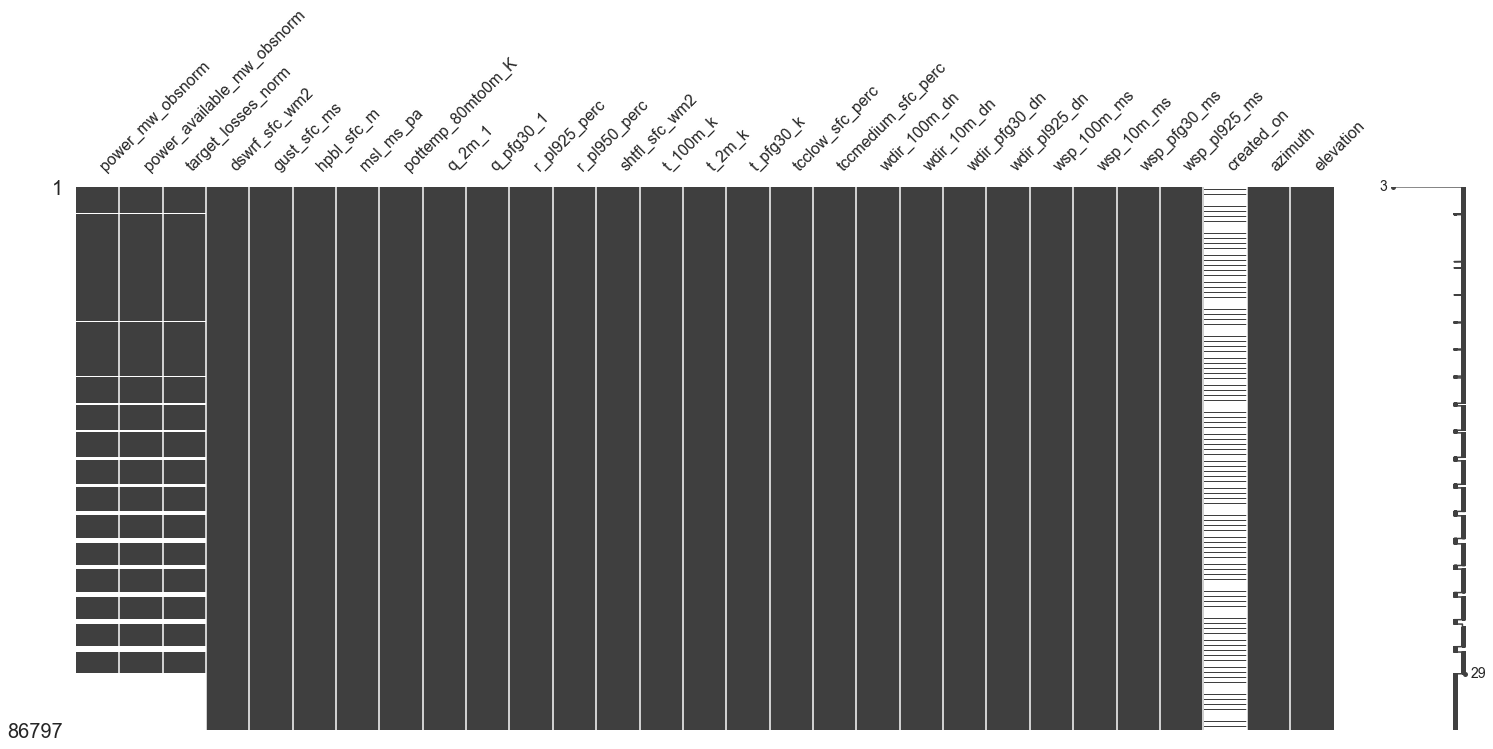

In [14]:
msno.matrix(df);

**Observations:**
- `created_on`: frequency interpolation did not work for TimeStamp data (created_on), column will be dropped anyway. 
- target dataframe (first three coloumns): harmonisation of overall timeframe needed
- target data is discontinuous

In [15]:
# Percentage and Number of NaN-Values
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
print()
print('MISSING VALUES (absolut and in percent)')
missing[missing.Number!=0].T


MISSING VALUES (absolut and in percent)


,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,t_100m_k,t_2m_k,t_pfg30_k,tcclow_sfc_perc,tccmedium_sfc_perc,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,created_on,azimuth,elevation
Number,16087.0,16087.0,16087.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,72419.0,36.0,36.0
Percentage,18.5,18.5,18.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.4,0.0,0.0


## Dropping Column "created_on"

In [16]:
df.drop(columns = ["created_on"], inplace = True)

## Timeframe harmonisation

In [17]:
start_index_str = "2018-01-01 06:00:00"
start_index = pd.to_datetime(start_index_str)


end_index_str = "2019-06-25 01:50:00"
end_index = pd.to_datetime(end_index_str)



print('Start Index of united DataFrame: ', start_index)
print('End Index of united DataFrame: ', end_index)

Start Index of united DataFrame:  2018-01-01 06:00:00
End Index of united DataFrame:  2019-06-25 01:50:00


In [18]:
df = df[(df.index <= end_index) & (df.index >= start_index)]
print('First and last observations:')
pd.concat([df.head(2), df.tail(2)])

First and last observations:


,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,t_100m_k,t_2m_k,t_pfg30_k,tcclow_sfc_perc,tccmedium_sfc_perc,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,azimuth,elevation
2018-01-01 06:00:00,0.486251,0.911849,0.425598,0.0,16.777032,1349.927656,99212.062500,0.559356,0.005105,0.004852,89.975000,83.075000,-58.444885,280.079346,280.496348,279.811816,99.375000,49.500000,54.455224,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,111.880959,-12.132894
2018-01-01 06:10:00,0.528225,0.932739,0.404513,0.0,16.748651,1350.376965,99220.020833,0.554256,0.005088,0.004833,89.854167,82.937500,-58.558706,280.057788,280.470277,279.787207,99.354167,54.458333,55.784078,53.253883,56.181451,60.237190,16.589409,9.804977,16.657162,21.955989,113.717751,-10.743970
2019-06-25 01:40:00,0.308457,0.338645,0.030189,0.0,9.875370,224.096558,102141.404167,2.363946,0.009756,0.009464,49.275000,46.033333,-50.096021,291.646208,289.825765,291.759709,0.000000,0.000000,306.634403,295.683603,309.412828,343.164726,8.642075,4.004936,8.761264,9.492873,31.591799,-9.437372
2019-06-25 01:50:00,0.309148,0.339853,0.030705,0.0,9.713995,217.509660,102131.514583,2.370229,0.009704,0.009422,48.712500,45.616667,-49.312354,291.570260,289.732206,291.704854,0.000000,0.000000,306.528820,295.343899,309.409961,343.030446,8.607915,3.982537,8.720545,9.338253,33.775887,-8.668407


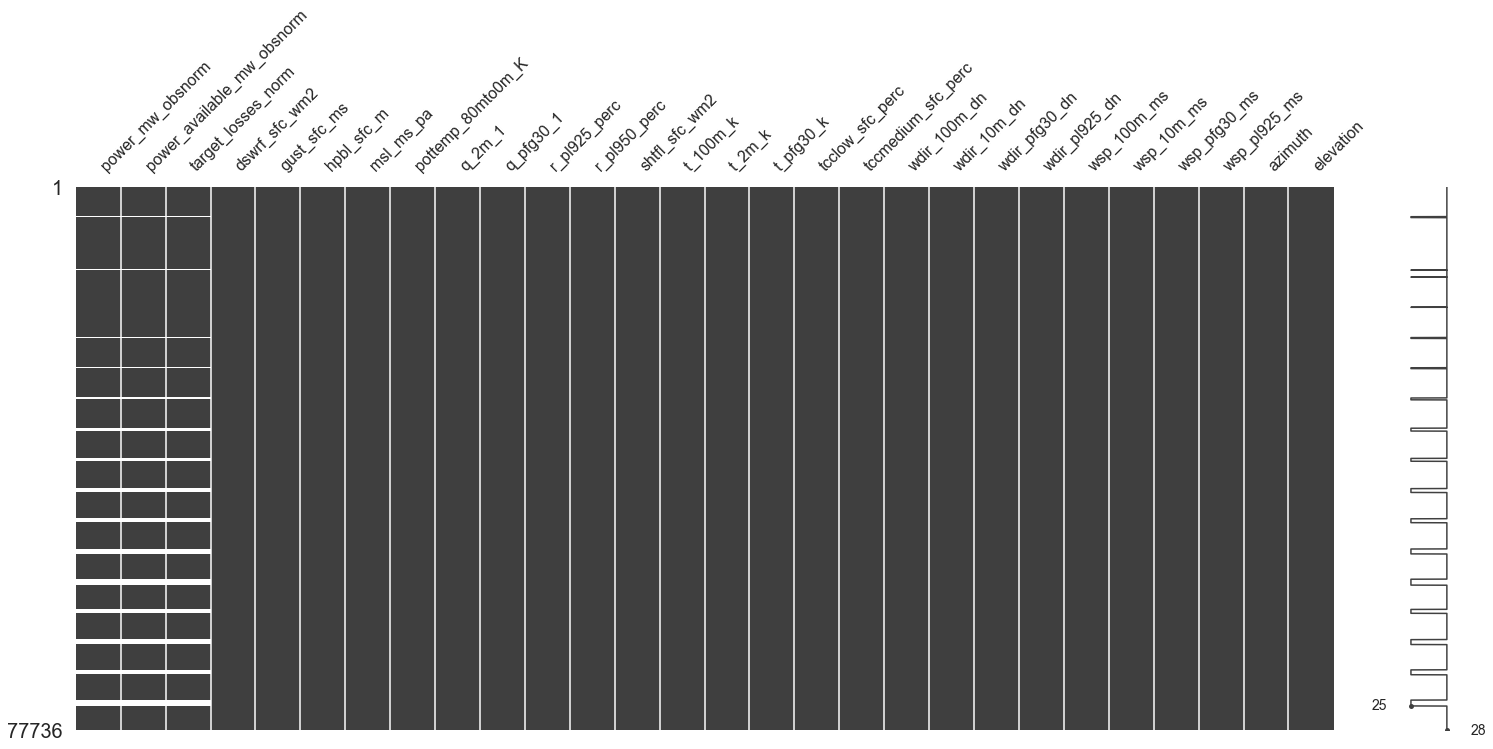

In [19]:
msno.matrix(df);

## Checking for duplicate timestamps

In [20]:
np.any(df.index.duplicated())

False

There are no duplicate timestamps in the dataframe.

## Discontinuous target data

**Problem:** As described above, while working on the dataset it became obvious that the target data (target_losses) is not continuous, e.g., several timeframes were missing. 

**Solution:** as an interpolation strategy the *Standard Week* is computed, a representation of the average hour on every day of the week, e.g., a 'Standard Monday', a 'Standard Tuesday'. This Standard Week is then used to fill the data gap. This is done for all three target data features (e.g., power_mw_obsnorm, power_available_mw_obsnorm,  target_losses_norm). 

### Inspection of discontinuous  target data

At first glance, the data seems continuous: 

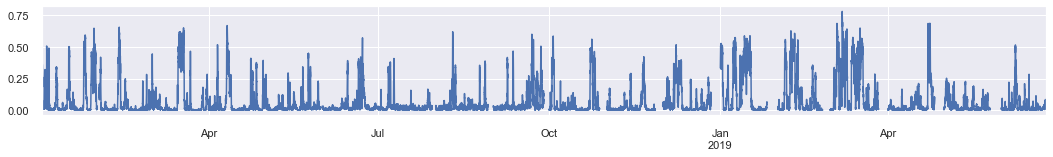

In [21]:
df.target_losses_norm.plot(figsize=(18, 2));

But inspecting very close, there are gaps within the target data:

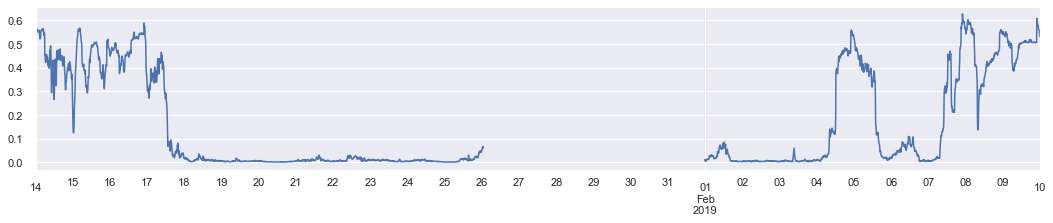

In [22]:
start_index = pd.to_datetime("2019-01-14 00:00:00")
end_index = pd.to_datetime("2019-02-10 00:00:00")
df.target_losses_norm[start_index:end_index].plot(figsize=(18, 3));

### Dealing with discontinuous target data

In [23]:
df['index1'] = df.index
# creating columns for the different time intervals the observations can be grouped by
df['Date'] = pd.to_datetime(df.index1.dt.date)
df['year'] = df.index1.dt.year
df['month'] = df.index1.dt.month
df['day'] = df.index1.dt.day
df['hour'] = df.index1.dt.hour
df['minute'] = df.index1.dt.minute

# creating a weekday column
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
df['weekday'] = df.index1.dt.weekday.map(weekdays)

# creating a float representation of every possible time interval in one Standard Week
df['day_hour_minute'] = df.index1.dt.weekday + df['hour']*1/24 + (df['minute']//10 * 1/144)

df.drop(columns = ["index1"], inplace = True)
df.head(2)

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,t_100m_k,t_2m_k,t_pfg30_k,tcclow_sfc_perc,tccmedium_sfc_perc,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,azimuth,elevation,Date,year,month,day,hour,minute,weekday,day_hour_minute
2018-01-01 06:00:00,0.486251,0.911849,0.425598,0.0,16.777032,1349.927656,99212.062500,0.559356,0.005105,0.004852,89.975000,83.0750,-58.444885,280.079346,280.496348,279.811816,99.375000,49.500000,54.455224,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,111.880959,-12.132894,2018-01-01,2018,1,1,6,0,Monday,0.250000
2018-01-01 06:10:00,0.528225,0.932739,0.404513,0.0,16.748651,1350.376965,99220.020833,0.554256,0.005088,0.004833,89.854167,82.9375,-58.558706,280.057788,280.470277,279.787207,99.354167,54.458333,55.784078,53.253883,56.181451,60.237190,16.589409,9.804977,16.657162,21.955989,113.717751,-10.743970,2018-01-01,2018,1,1,6,10,Monday,0.256944


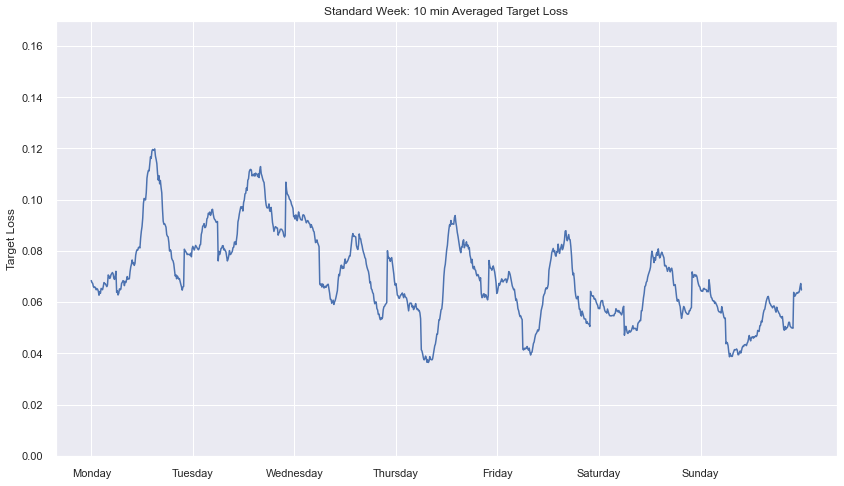

In [24]:
#Plotting average hourly load profile observed over the entire period 
df.groupby('day_hour_minute')['target_losses_norm'].mean().plot(figsize = (14,8))
_ = plt.ylabel('Target Loss')
_ = plt.xlabel('')
_ = plt.ylim([0, max(df.groupby('day_hour_minute')['target_losses_norm'].mean()) + 0.05])
#the xticks are values between 0 and 7 (e.g., just like day_hour_minute), hence the np.arange() command
_ = plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = plt.title('Standard Week: 10 min Averaged Target Loss')

In [25]:
# creating series objects with the different timestamps of a day and their corresponding mean values for target data
day_hour_minute_means_loss = df.groupby('day_hour_minute')['target_losses_norm'].mean().reset_index()
day_hour_minute_means_available = df.groupby('day_hour_minute')['power_available_mw_obsnorm'].mean().reset_index()
day_hour_minute_means_cons = df.groupby('day_hour_minute')['power_mw_obsnorm'].mean().reset_index()

# creating dictionaries to map the mean values to the according timestamps
day_hour_minute_means_loss_dict = dict(zip(day_hour_minute_means_loss.day_hour_minute, day_hour_minute_means_loss.target_losses_norm))
day_hour_minute_means_available_dict = dict(zip(day_hour_minute_means_available.day_hour_minute, day_hour_minute_means_available.power_available_mw_obsnorm))
day_hour_minute_means_cons_dict = dict(zip(day_hour_minute_means_cons.day_hour_minute, day_hour_minute_means_cons.power_mw_obsnorm))

# mapping the mean values to the according timestamps
df["mean_losses"] = df["day_hour_minute"].map(day_hour_minute_means_loss_dict)
df["mean_available"] = df["day_hour_minute"].map(day_hour_minute_means_available_dict)
df["mean_cons"] = df["day_hour_minute"].map(day_hour_minute_means_cons_dict)

# filling in the nan values in our target data with the mean value for the corresponding timestamp on the day
df["target_losses_norm"].fillna(df["mean_losses"], inplace=True)
df["power_available_mw_obsnorm"].fillna(df["mean_losses"], inplace=True)
df["power_mw_obsnorm"].fillna(df["mean_losses"], inplace=True)

# dropping the columns with the mean values again
df.drop(columns = ["mean_losses", "mean_available", "mean_cons", "day_hour_minute"], inplace = True)

df.head(2)

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,t_100m_k,t_2m_k,t_pfg30_k,tcclow_sfc_perc,tccmedium_sfc_perc,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,azimuth,elevation,Date,year,month,day,hour,minute,weekday
2018-01-01 06:00:00,0.486251,0.911849,0.425598,0.0,16.777032,1349.927656,99212.062500,0.559356,0.005105,0.004852,89.975000,83.0750,-58.444885,280.079346,280.496348,279.811816,99.375000,49.500000,54.455224,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,111.880959,-12.132894,2018-01-01,2018,1,1,6,0,Monday
2018-01-01 06:10:00,0.528225,0.932739,0.404513,0.0,16.748651,1350.376965,99220.020833,0.554256,0.005088,0.004833,89.854167,82.9375,-58.558706,280.057788,280.470277,279.787207,99.354167,54.458333,55.784078,53.253883,56.181451,60.237190,16.589409,9.804977,16.657162,21.955989,113.717751,-10.743970,2018-01-01,2018,1,1,6,10,Monday


In [26]:
# Percentage and Number of NaN-Values
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
print()
print('MISSING VALUES (absolut and in percent)')
missing[missing.Number!=0].T


MISSING VALUES (absolut and in percent)


""
Number
Percentage


### Solution: continuous target data

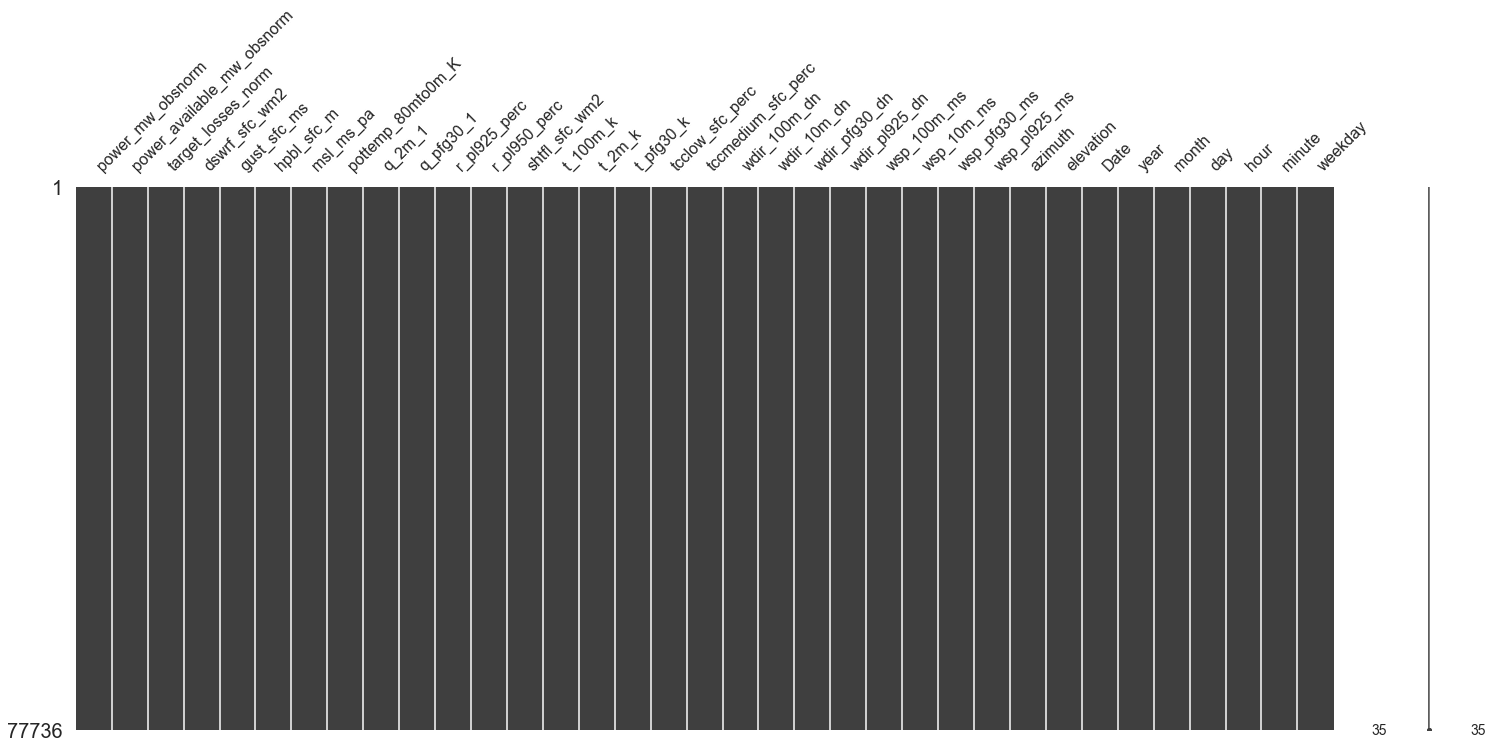

In [27]:
msno.matrix(df);

**Observation:** In the following graph the data gaps are filled. 

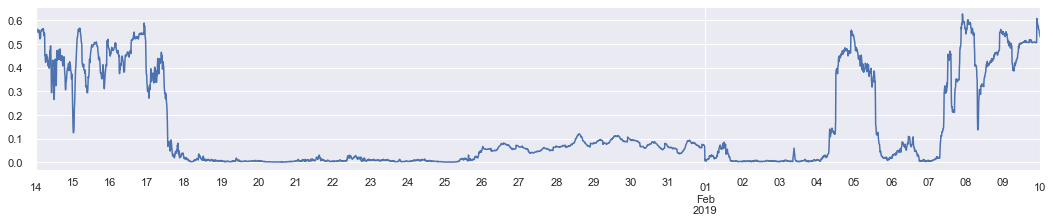

In [28]:
start_index = pd.to_datetime("2019-01-14 00:00:00")
end_index = pd.to_datetime("2019-02-10 00:00:00")
df.target_losses_norm[start_index:end_index].plot(figsize=(18, 3));

# Inconsistent / Artificial Timespan in GFS data

Within the GFS data seemingly inconsistent / artificial data is observered, beginning at `2019-04-30 15:00:00` and lasting until `2019-05-04 07:00:00`, visualized below. 

In [29]:
#calculating timedetla  
start_index = pd.to_datetime("2019-04-30 15:00:00")
end_index = pd.to_datetime("2019-05-04 07:00:00")
print('Timedelta: ', start_index - end_index)

Timedelta:  -4 days +08:00:00


## Inspection of inconsistent / artificial data

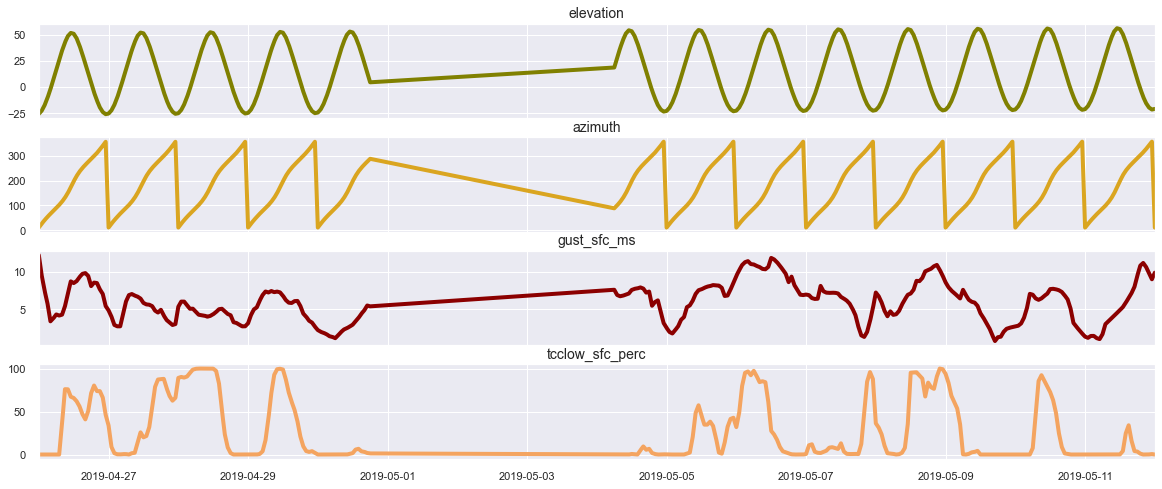

In [30]:
#### DATA SELECTION ####
start_index = pd.to_datetime("2019-04-26 00:00:00")
end_index = pd.to_datetime("2019-05-12 00:00:00")
f_to_plot = ['elevation', 'azimuth','gust_sfc_ms', 'tcclow_sfc_perc']

#reduced timeframe
df_reduced = df[(df.index <= end_index) & (df.index >= start_index)]

#### PLOTTING #####
color=iter(['olive', 'goldenrod', 'darkred', 'sandybrown', 'sienna', 'grey'])
fig, axs = plt.subplots(len(f_to_plot), sharex=True, figsize=(20,len(f_to_plot)*2), facecolor='w')
for f, axes in zip(f_to_plot, axs): 
    c=next(color, 'goldenrod')
    axes.plot(df_reduced[f], color=c, lw=4)
    axes.set_title(f, fontsize=14)
    axes.set_xlim(left=start_index, right=end_index)
plt.show(fig);

## Dealing with inconsistent / artificial Data

Various approaches to this interpolated data timespan have been discussed:
- (chosen approach) cutoff at `2019-04-30 06:00:00` 
- keeping it as it is since these 4 days will most likely not effect how the prediction models perform
- (future work) interpolation with *Standard Week* as done above for target data 

In [31]:
#cutting of data due to inconsistency
cutoff_timestamp = "2019-04-30 06:00:00"
print('New end date due to artificial GFS Data: ', pd.to_datetime(cutoff_timestamp))

span_before = df.index[-1] - df.index[0]
span_after = pd.to_datetime(cutoff_timestamp) - df.index[0]

print('Number of days BEFORE cutoff due to Artificial GFS Data: ', span_before.days)
print('Number of days AFTER cutoff due to Artificial GFS Data: ', span_after.days)
print()
print('Number of days cutoff: ', (span_before-span_after).days)

New end date due to artificial GFS Data:  2019-04-30 06:00:00
Number of days BEFORE cutoff due to Artificial GFS Data:  539
Number of days AFTER cutoff due to Artificial GFS Data:  484

Number of days cutoff:  55


In [32]:
df = df[(df.index <= pd.to_datetime(cutoff_timestamp))]
print('First and last observations:')
pd.concat([df.head(1), df.tail(1)])

First and last observations:


,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,t_100m_k,t_2m_k,t_pfg30_k,tcclow_sfc_perc,tccmedium_sfc_perc,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,azimuth,elevation,Date,year,month,day,hour,minute,weekday
2018-01-01 06:00:00,0.486251,0.911849,0.425598,0.0,16.777032,1349.927656,99212.06250,0.559356,0.005105,0.004852,89.975,83.075,-58.444885,280.079346,280.496348,279.811816,99.375,49.5,54.455224,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,111.880959,-12.132894,2018-01-01,2018,1,1,6,0,Monday
2019-04-30 06:00:00,0.076080,0.076080,0.076080,180.5,1.183948,83.199766,102202.15625,0.228296,0.005010,0.004551,76.100,79.625,6.353638,281.250000,281.799976,281.325000,0.000,0.0,181.629068,186.329332,181.860202,193.058927,1.647042,0.883608,1.705760,5.342644,89.258858,17.706749,2019-04-30,2019,4,30,6,0,Tuesday


# Data Exploration

For a thorough data exploration, `df.working_day` and `df.summer` will be added. 

## Adding column "working_day"

Since the energy consumption in the grid might be correlated to the day being a working or non working day, a feature called working day is implemented. All the weekend days and the national holidays for Germany will be categorized as non-working days.

In [33]:
#workalendar is a non-standard, single-use libary 
#workalendar is hence is loaded seperate
try:
    import workalendar
    print("module 'workalendar' is installed.")
except ModuleNotFoundError:
    print("module 'workalendar' will be installed and imported.")
    print()
    ! pip install workalendar
    import workalendar

module 'workalendar' is installed.


In [34]:
from workalendar.europe import Germany
cal = Germany()
df["working_day"] = df["Date"].apply(lambda x: cal.is_working_day(x))
df.sample(2)

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,t_100m_k,t_2m_k,t_pfg30_k,tcclow_sfc_perc,tccmedium_sfc_perc,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,azimuth,elevation,Date,year,month,day,hour,minute,weekday,working_day
2019-04-13 19:10:00,0.351329,0.384353,0.033024,0.000000,11.070135,673.278412,102773.246667,1.172225,0.003437,0.003244,86.533333,83.375000,-49.294093,274.840588,274.491569,274.695622,50.9375,0.0,248.140090,243.338440,248.423751,255.315773,9.687133,4.713052,9.334671,13.290371,296.902191,-9.698433,2019-04-13,2019,4,13,19,10,Saturday,False
2019-04-15 15:40:00,0.238643,0.287176,0.048533,433.333333,8.554356,918.620461,102736.337500,-0.479447,0.004452,0.004065,81.166667,78.441667,97.627083,280.883333,282.371549,280.853255,0.0000,0.0,260.400418,258.143329,260.520573,277.768285,8.898134,6.409195,8.767658,9.861558,255.791748,22.684574,2019-04-15,2019,4,15,15,40,Monday,True


## Adding column "season"

Since the location of our wind farm is in northern Germany we will apply a filter on our dataset that separates the dates into two basic seasons (summer and winter). As the summer in northern Germany tends to be shorter, only the months from May to August will be declared summer months.

In [35]:
def season_calc(month):
    if month in [5,6,7,8]:
        return 1 #"summer"
    else:
        return 0 #"winter"
    
df['summer'] = df.Date.dt.month.apply(season_calc)
df.head(2)

,power_mw_obsnorm,power_available_mw_obsnorm,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,pottemp_80mto0m_K,q_2m_1,q_pfg30_1,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,t_100m_k,t_2m_k,t_pfg30_k,tcclow_sfc_perc,tccmedium_sfc_perc,wdir_100m_dn,wdir_10m_dn,wdir_pfg30_dn,wdir_pl925_dn,wsp_100m_ms,wsp_10m_ms,wsp_pfg30_ms,wsp_pl925_ms,azimuth,elevation,Date,year,month,day,hour,minute,weekday,working_day,summer
2018-01-01 06:00:00,0.486251,0.911849,0.425598,0.0,16.777032,1349.927656,99212.062500,0.559356,0.005105,0.004852,89.975000,83.0750,-58.444885,280.079346,280.496348,279.811816,99.375000,49.500000,54.455224,51.936818,54.855777,58.963042,16.548291,9.772748,16.622077,21.963719,111.880959,-12.132894,2018-01-01,2018,1,1,6,0,Monday,False,0
2018-01-01 06:10:00,0.528225,0.932739,0.404513,0.0,16.748651,1350.376965,99220.020833,0.554256,0.005088,0.004833,89.854167,82.9375,-58.558706,280.057788,280.470277,279.787207,99.354167,54.458333,55.784078,53.253883,56.181451,60.237190,16.589409,9.804977,16.657162,21.955989,113.717751,-10.743970,2018-01-01,2018,1,1,6,10,Monday,False,0


## Hourly Frequency Analysis

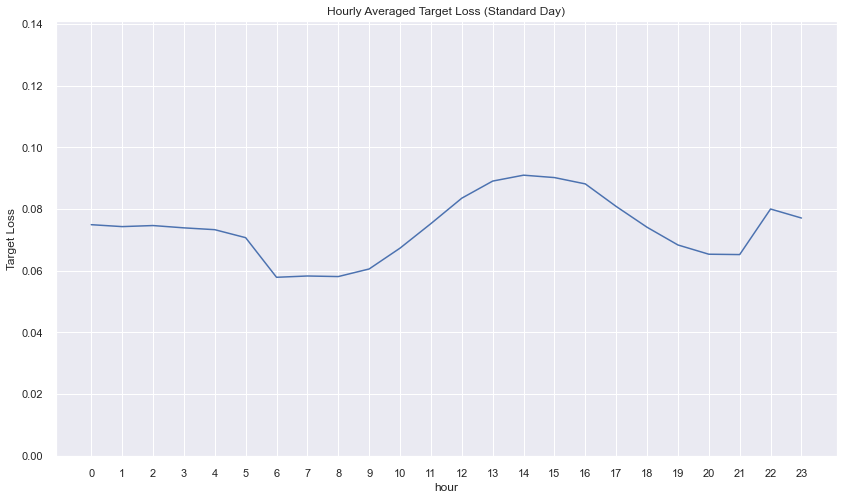

In [36]:
#Plotting average hourly load profile observed over the entire period 
df.groupby('hour')['target_losses_norm'].mean().plot(figsize = (14,8))
_ = plt.ylabel('Target Loss')
_ = plt.ylim([0, max(df.groupby('hour')['target_losses_norm'].mean()) + 0.05])
_ = plt.xticks(df['hour'].unique())
_ = plt.title('Hourly Averaged Target Loss (Standard Day)')

**Observations:**
- Energy lost through Feed-In Management Events is greater in the afternoon. This is potentially explained by greater solar power production in the afternoon. 
- Great energy loss is observable in the evenings, potentially explained by the availability of wind energy in the evening (sea breeze, as explained below) combined with lower energy consumption in the grid. 


>  A sea breeze or onshore breeze is any wind that blows from a large body of water toward or onto a landmass; it develops due to differences in air pressure created by the differing heat capacities of water and dry land. As such, sea breezes are more localised than prevailing winds. Because land absorbs solar radiation far more quickly than water, a sea breeze is a common occurrence along coasts after sunrise. **Wind farms are often situated near a coast to take advantage of the normal daily fluctuations of wind speed resulting from sea or land breezes**. [Wikipedia - Sea Breeze](https://en.wikipedia.org/wiki/Sea_breeze)

## Avg hour over avg weekday

### Avg Target at each hour over each weekday

In [37]:
#Using pivot table to create a dataframe having index as hours and columns as weekdays and each cell will contain the average
#energy consumption for that particular hour of the weekday

hour_weekday = df.pivot_table(values='target_losses_norm', index='hour', columns = 'weekday', aggfunc = 'mean')
columns = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
hour_weekday = hour_weekday[columns]

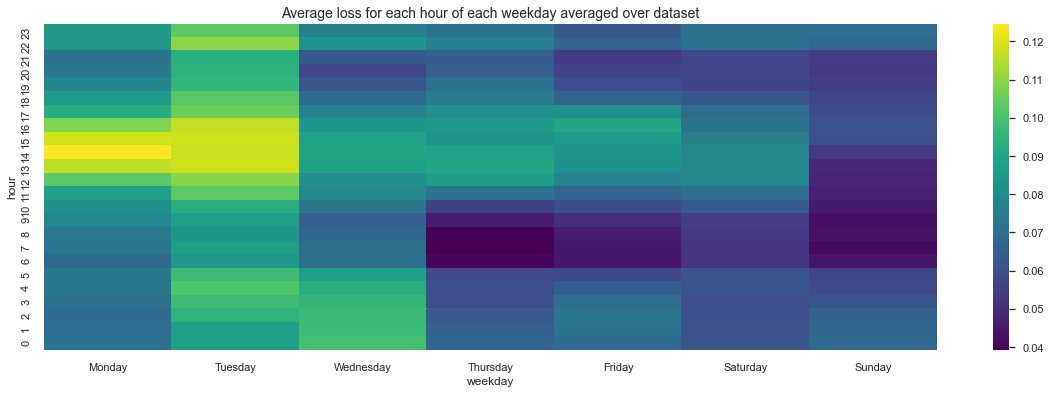

In [38]:
#plotting a heatmap with a colorbar; the colorbar shows the energy consumption in MWH
_ = plt.figure(figsize=(20, 6))
ax = sns.heatmap(hour_weekday.sort_index(ascending = False), cmap='viridis')
#_ = plt.title('Average energy consumption in MWH for each hour of each weekday over the entire period')
_ = ax.set_title("Average loss for each hour of each weekday averaged over dataset", fontsize = 14)


### Avg consumed power at each hour over each weekday

In [39]:
#Using pivot table to create a dataframe having index as hours and columns as weekdays and each cell will contain the average
#energy consumption for that particular hour of the weekday

hour_weekday_consumed = df.pivot_table(values='power_mw_obsnorm', index='hour', columns = 'weekday', aggfunc = 'mean')
columns = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
hour_weekday_consumed = hour_weekday[columns]


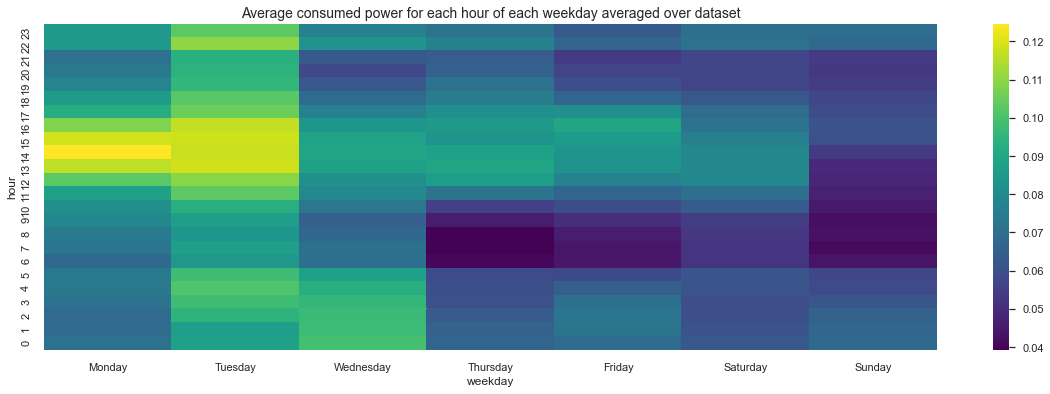

In [40]:
#plotting a heatmap with a colorbar; the colorbar shows the energy consumption in MWH
_ = plt.figure(figsize=(20, 6))
ax = sns.heatmap(hour_weekday_consumed.sort_index(ascending = False), cmap='viridis')
#_ = plt.title('Average energy consumption in MWH for each hour of each weekday over the entire period')
_ = ax.set_title("Average consumed power for each hour of each weekday averaged over dataset", fontsize = 14)


**Observations:** 
- consumed power is not representative for the overall power consumption of the local grid, but rather for the amount of wind power fed into the grid (normed on the maximum available power = installed power)

## Graph: Power available vs Power fed into the grid

As discussed above: A Feed-In Managment event is given, when the available power is greater than the power that is (and can be) fed into the grid. In the following graph the Feed-In Management over the given timespan is shown (resolution: weekly). 

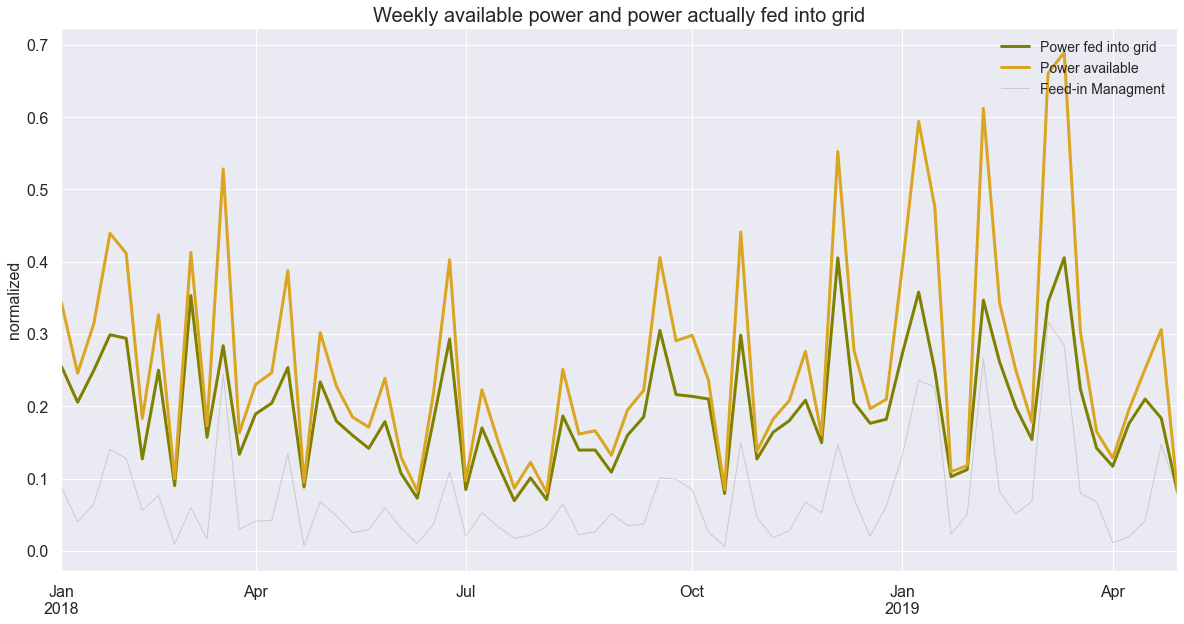

In [41]:
###### DATA SELECTION ###### 
weekly_feedin = df['power_mw_obsnorm'].resample('W').mean()
weekly_available = df['power_available_mw_obsnorm'].resample('W').mean()
weekly_loss = df['target_losses_norm'].resample('W').mean()
###### DATA PLOTTING ###### 
fig, ax = plt.subplots(figsize=(20,10))
weekly_feedin.plot(label='Power fed into grid',color='olive', lw=3)
weekly_available.plot(label='Power available',color='goldenrod', lw=3)
weekly_loss.plot(label='Feed-in Managment',color='grey', alpha=0.3,  lw=1)

### Moving Mean
#moving_mean = df['power_mw_obsnorm'].resample('W').mean().rolling(4).mean()
#moving_mean.plot(label='Power available',color='green')
######


###### PLOT SETTINGS #######
plt.ylabel('normalized', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Weekly available power and power actually fed into grid', fontsize=20)
plt.legend(loc='upper right', fontsize=14)

### CLEANING WORKSPACE ###
del weekly_feedin, weekly_available, weekly_loss


###### OUTPUT #######
plt.savefig('figures/available_fedin.png', bbox_inches='tight', transparent=True)
plt.show;

**Observation:** At any given week, the available power is greater than the power fed into the grid (used power). Hence, at any given week curtailment of power fed into the system is observable (feed-in managment / EinsMan Events). In an ideal week, the power available nearly equals the power used/fed into the grid - a balanced energy grid with very little energy being lost (read: not created, e.g., due to pitching of wind turbine blades). 

## Graph: [weekly] Influence of Wind on the Feed-In Management 

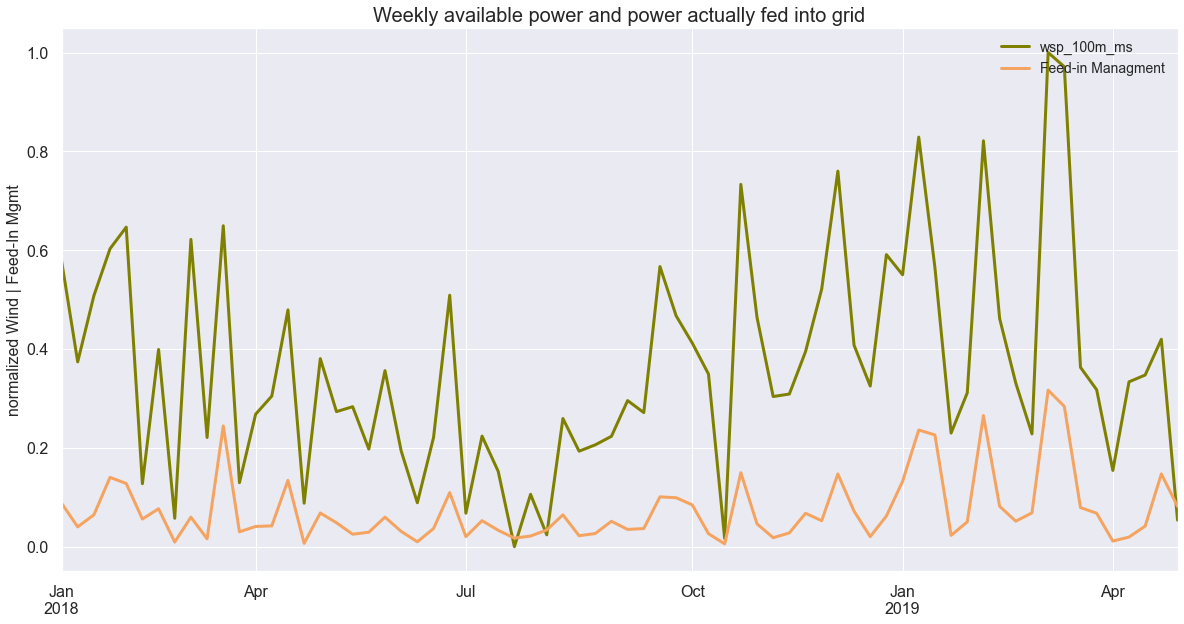

In [42]:
###### DATA SELECTION ###### 
weekly_wsp = df['wsp_100m_ms'].resample('W').mean()
weekly_wsp = (weekly_wsp-weekly_wsp.min())/(weekly_wsp.max()-weekly_wsp.min())
weekly_loss = df['target_losses_norm'].resample('W').mean()
###### DATA PLOTTING ###### 
fig, ax = plt.subplots(figsize=(20,10))
weekly_wsp.plot(label='wsp_100m_ms',color='olive', lw=3)
weekly_loss.plot(label='Feed-in Managment',color='sandybrown',  lw=3)


###### PLOT SETTINGS #######
plt.ylabel('normalized Wind | Feed-In Mgmt', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Weekly available power and power actually fed into grid', fontsize=20)
plt.legend(loc='upper right', fontsize=14)

### CLEANING WORKSPACE ###
del weekly_wsp, weekly_loss


###### OUTPUT #######
plt.savefig('figures/wind_FeedIn.png', bbox_inches='tight', transparent=True)
plt.show;

**Observation:** On a weekly bases, only little correlation between high windspeeds and Feed-In Managment can be observered. `-->` Looking at a smaller timespan at higher resultion in the next step. 

## Graph: [daily] Influence of Wind on the Feed-In Management 

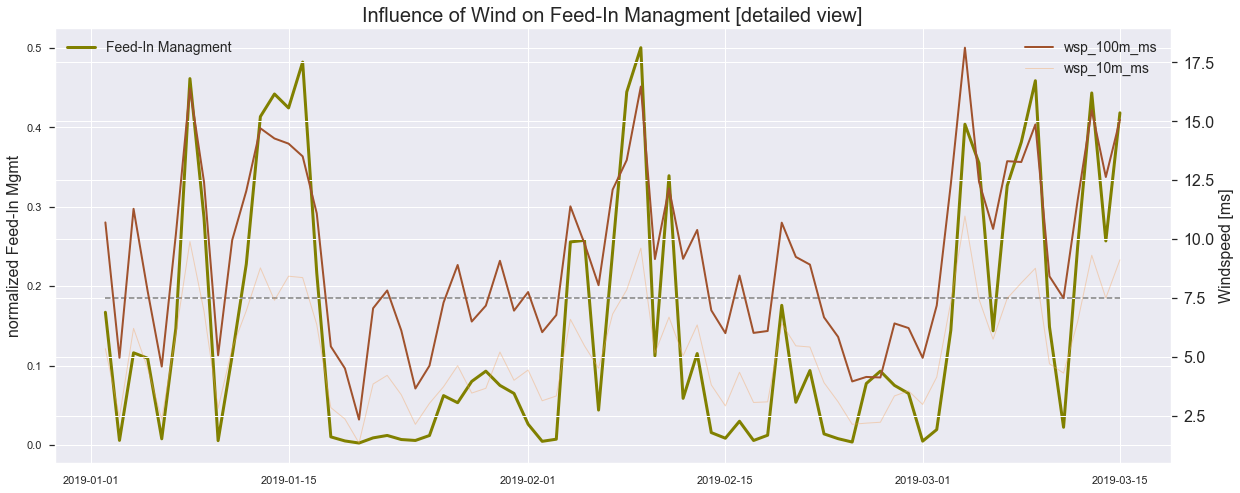

In [43]:
###### DATA SELECTION ###### 
start_index = pd.to_datetime("2019-01-02 00:00:00")
end_index = pd.to_datetime("2019-03-15 00:00:00")
#reduced timeframe
df_reduced = df[(df.index <= end_index) & (df.index >= start_index)]
#resampling
weekly_wsp_100 = df_reduced['wsp_100m_ms'].resample('D').mean()
weekly_wsp_10 = df_reduced['wsp_10m_ms'].resample('D').mean()
weekly_loss = df_reduced['target_losses_norm'].resample('D').mean()

###### DATA PLOTTING ###### 
fig, ax1 = plt.subplots(figsize=(20,8))
#left axis
ax1.set_ylabel('normalized Feed-In Mgmt', fontsize=16)
ax1.plot(weekly_loss, label='Feed-In Managment',color='olive',  lw=3)
ax1.legend(loc='upper left', fontsize=14)
#right axis
ax2 = ax1.twinx()
ax2.plot(weekly_wsp_100, label='wsp_100m_ms',color='sienna', lw=2)
ax2.plot(weekly_wsp_10, label='wsp_10m_ms',color='sandybrown', lw=1, alpha=0.4)
ax2.legend(loc='upper right', fontsize=14)
ax2.set_ylabel('Windspeed [ms]', fontsize=16)
ax2.legend(loc='upper right', fontsize=14)
#general settings
plt.tick_params(labelsize=16)
plt.title('Influence of Wind on Feed-In Managment [detailed view]', fontsize=20)
plt.hlines(7.5, start_index, end_index, linestyles='dashed', colors = 'grey')

### CLEANING WORKSPACE ###
del weekly_wsp_100, weekly_wsp_10, weekly_loss

###### OUTPUT #######
plt.savefig('figures/wind_FeedIn_detail.png', bbox_inches='tight', transparent=True)
plt.show;

**Observations:** 
- As a rule-of-thumb, for `wsp_10m_m`, windspeeds above a certain value (e.g., 7.5 ms) stimulate the Feed-In Management exponential
- windspeed at 100m above ground is highly corrolated to windspeed at 10m above ground. `wsp_10m_ms` is the windspeed at turbine height, hence `wsp_10m_m` will be dropped

## Graph: Correlation Windspeed and  Feed-In Management

<Figure size 1440x864 with 0 Axes>

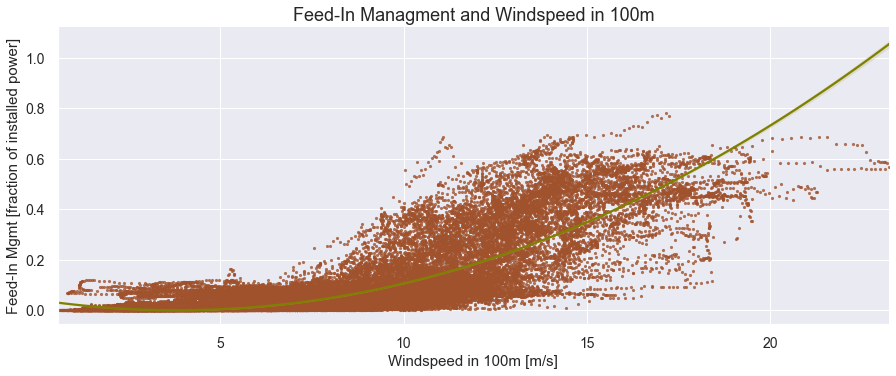

In [44]:
###### DATA SELECTION ###### 
x_selected = "wsp_100m_ms"
y_selected = "target_losses_norm"

###### DATA PLOTTING ###### 
plt.figure(figsize=(20,12))
g = sns.lmplot(data = df,
            x=x_selected,
            y=y_selected, 
            height=5, 
            aspect=2.5,
            order=2, 
            line_kws={'color': 'olive'}, 
            scatter_kws={'color': 'sienna', 's':10 })
#general plot settings
plt.title('Feed-In Managment and Windspeed in 100m', fontsize=18)
plt.xlabel('Windspeed in 100m [m/s]', fontsize=15)
plt.ylabel('Feed-In Mgmt [fraction of installed power]', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


### CLEANING WORKSPACE ###
del x_selected, y_selected

###### OUTPUT #######
plt.savefig('figures/wind_FeedIn_corr.png', bbox_inches='tight', transparent=True)
plt.show(g);

**Observation:** 

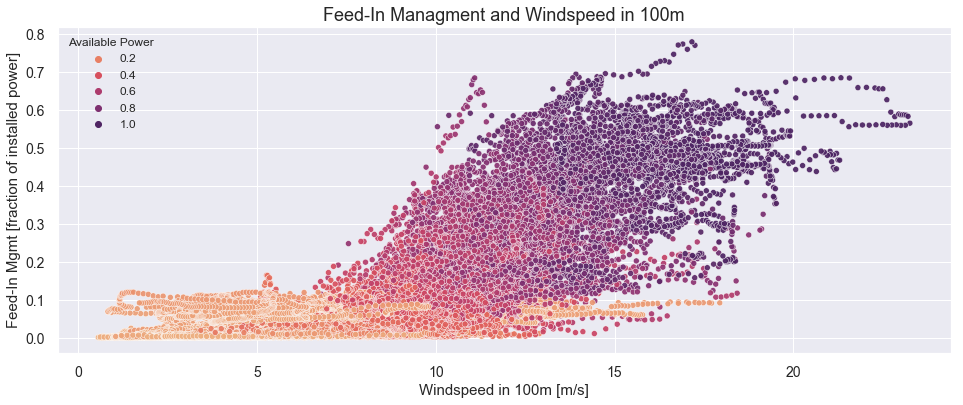

In [337]:
###### DATA SELECTION ###### 
x_selected = df.wsp_100m_ms
y_selected = df.target_losses_norm
hue_selected = df.power_available_mw_obsnorm

###### DATA PLOTTING ###### 
fig = plt.figure(figsize=(16,6))
sns.scatterplot(x=x_selected,
                y=y_selected,
                hue=hue_selected,
                palette= 'flare',
                alpha=0.925)
plt.title('Feed-In Managment and Windspeed in 100m', fontsize=18)
plt.xlabel('Windspeed in 100m [m/s]', fontsize=15)
plt.ylabel('Feed-In Mgmt [fraction of installed power]', fontsize=15)
plt.legend(loc='upper left', fontsize=12, title="Available Power")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### CLEANING WORKSPACE ###
del x_selected, y_selected, hue_selected

###### OUTPUT #######
plt.savefig('figures/wind_FeedIn_scatter.png', bbox_inches='tight', transparent=True)
plt.show();

**Observation:** 
- greater winds result in greater Fee-In Mgmt loss. 
- At greater winds more energy is available (color of the scatters) 

## Graph: dswrf_sfc_wm2 | elevation | azimuth

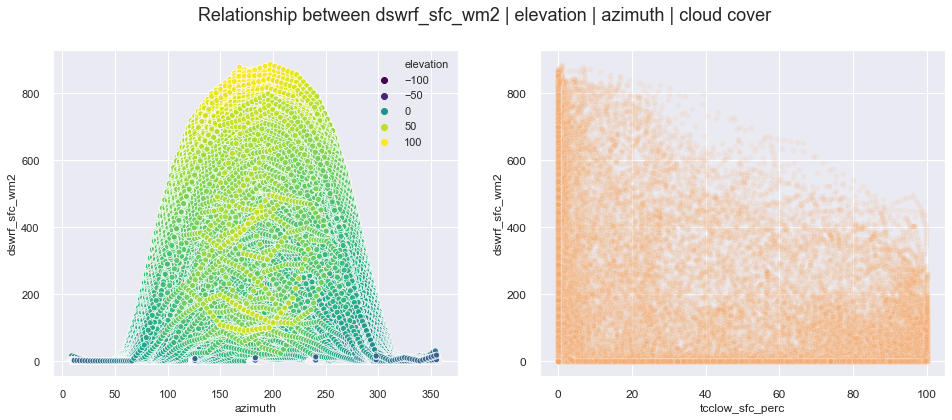

In [45]:
###### DATA SELECTION 1 ###### 
x_selected = df.azimuth
y_selected = df.dswrf_sfc_wm2
hue_selected = df.elevation

###### DATA PLOTTING ###### 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
fig.suptitle('Relationship between dswrf_sfc_wm2 | elevation | azimuth | cloud cover', fontsize=18)
###### PLOT 1 ###### 
sns.scatterplot(ax=ax1, 
                x=x_selected,
                y=y_selected,
                hue= hue_selected, 
                palette='viridis',
                alpha=0.925, 
                color='darkred')

###### DATA SELECTION 2 ###### 
x_selected = df.tcclow_sfc_perc
y_selected = df.dswrf_sfc_wm2
###### PLOT 2 ###### 
sns.scatterplot(ax=ax2, 
                x=x_selected,
                y=y_selected,
                palette='viridis',
                alpha=0.1,
                color='sandybrown')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### CLEANING WORKSPACE ###
del x_selected, y_selected

###### OUTPUT #######
plt.savefig('figures/different_sun_feature.png', bbox_inches='tight', transparent=True)
plt.show();

**Observation:** 
- the potential for high Solar Radiation is given when the sun shines from south (e.g., azimuth between 150° and 210°) and has a high elevation angle (e.g., > 25°). Cloud cover leads to less Solar Radiation even at great elevation. 
- greater cloud cover leads to less intense Solar Radiation (displayed for low clouds) 

## Graph: four different wind features

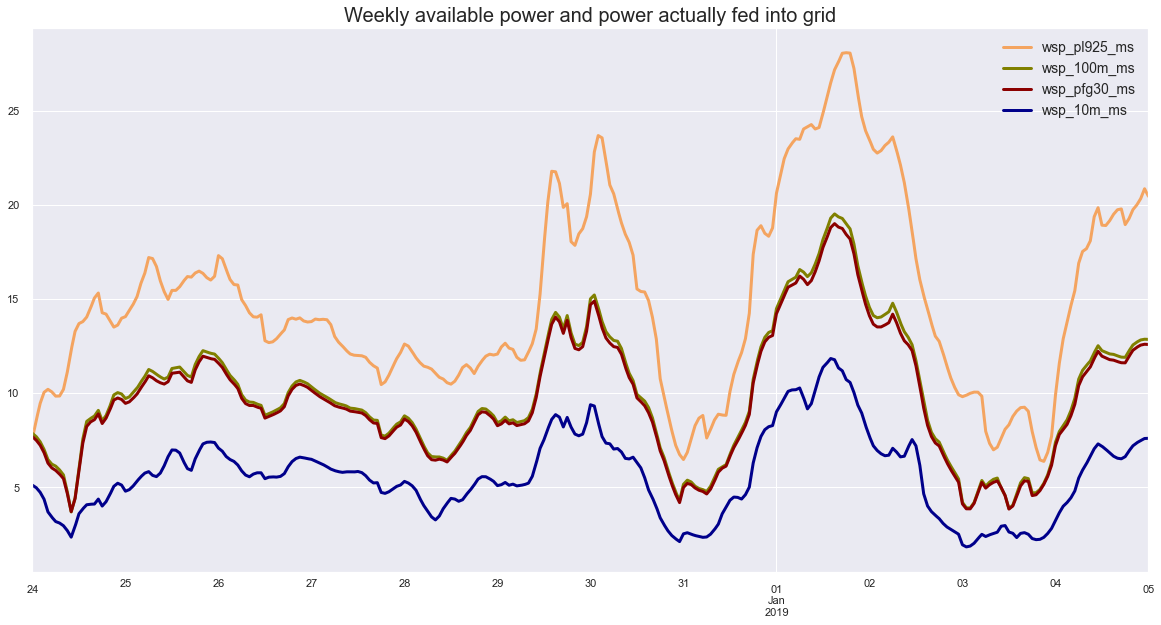

In [46]:
###### DATA SELECTION ###### 
start_index = pd.to_datetime("2018-12-24 00:00:00")
end_index = pd.to_datetime("2019-01-5 00:00:00")
#reduced timeframe
df_reduced = df[(df.index <= end_index) & (df.index >= start_index)]


###### DATA SELECTION ###### 
wsp_100m_ms = df_reduced['wsp_100m_ms']
wsp_10m_ms = df_reduced['wsp_10m_ms']
wsp_pfg30_ms = df_reduced['wsp_pfg30_ms']
wsp_pl925_ms = df_reduced['wsp_pl925_ms']


###### DATA PLOTTING ###### 
fig, ax = plt.subplots(figsize=(20,10))
wsp_pl925_ms.plot(label='wsp_pl925_ms',color='sandybrown', lw=3)
wsp_100m_ms.plot(label='wsp_100m_ms',color='olive', lw=3)
wsp_pfg30_ms.plot(label='wsp_pfg30_ms',color='darkred', lw=3)
wsp_10m_ms.plot(label='wsp_10m_ms',color='darkblue', lw=3)

###### PLOT SETTINGS #######
plt.title('Weekly available power and power actually fed into grid', fontsize=20)
plt.legend(loc='upper right', fontsize=14)

### CLEANING WORKSPACE ###
del wsp_100m_ms, wsp_10m_ms, wsp_pfg30_ms, wsp_pl925_ms


###### OUTPUT #######
plt.savefig('figures/different_wind_feature.png', bbox_inches='tight', transparent=True)
plt.show;

**Observation:** The different features expressing windspeed are highly correlated, especially noteable for `wsp_100m_ms` and `wsp_pfg30_ms`. Dropping of some of these features needs to be discussed. 

## Correlation of features with target_losses_norm

To get a feel for the importance of different features the features with the largest absolute correlation coefficients and the correlations inbetween them will be examined with a heatmap.

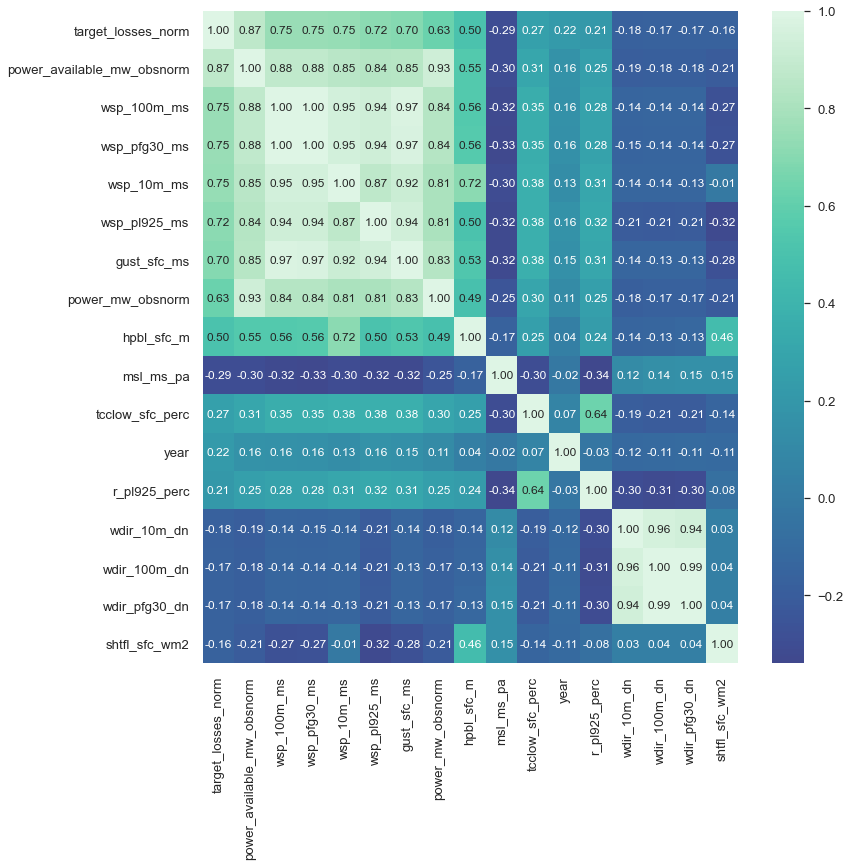

In [47]:
k = 17 #number of variables for heatmap
cols_corr_mat = np.abs(df.corr()).nlargest(k, 'target_losses_norm')['target_losses_norm'].index
cm = np.corrcoef(df[cols_corr_mat].dropna().values.T)
sns.set(font_scale=1.2)
plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 12},
                 yticklabels=cols_corr_mat.values, xticklabels=cols_corr_mat.values, cmap='mako', center=0.0)
plt.show()

In order to check the correlation of our target variable with past observations of available and consumed power a dataframe with the lagged values is created and the correlation checked in a heatmap.

In [48]:
heatmap = df[["target_losses_norm","power_mw_obsnorm", "power_available_mw_obsnorm"]].copy(deep= True)
heatmap.head(2)

,target_losses_norm,power_mw_obsnorm,power_available_mw_obsnorm
2018-01-01 06:00:00,0.425598,0.486251,0.911849
2018-01-01 06:10:00,0.404513,0.528225,0.932739


In [49]:
# creating lagged observations of power_mw_obsnorm and power_available_mw_obsnorm
for i in range(1,6):
    heatmap[f"power_mw_obsnorm_{i*10}"] = heatmap["power_mw_obsnorm"].shift(i)
    heatmap[f"power_available_mw_obsnorm_{i*10}"] = heatmap["power_available_mw_obsnorm"].shift(i)

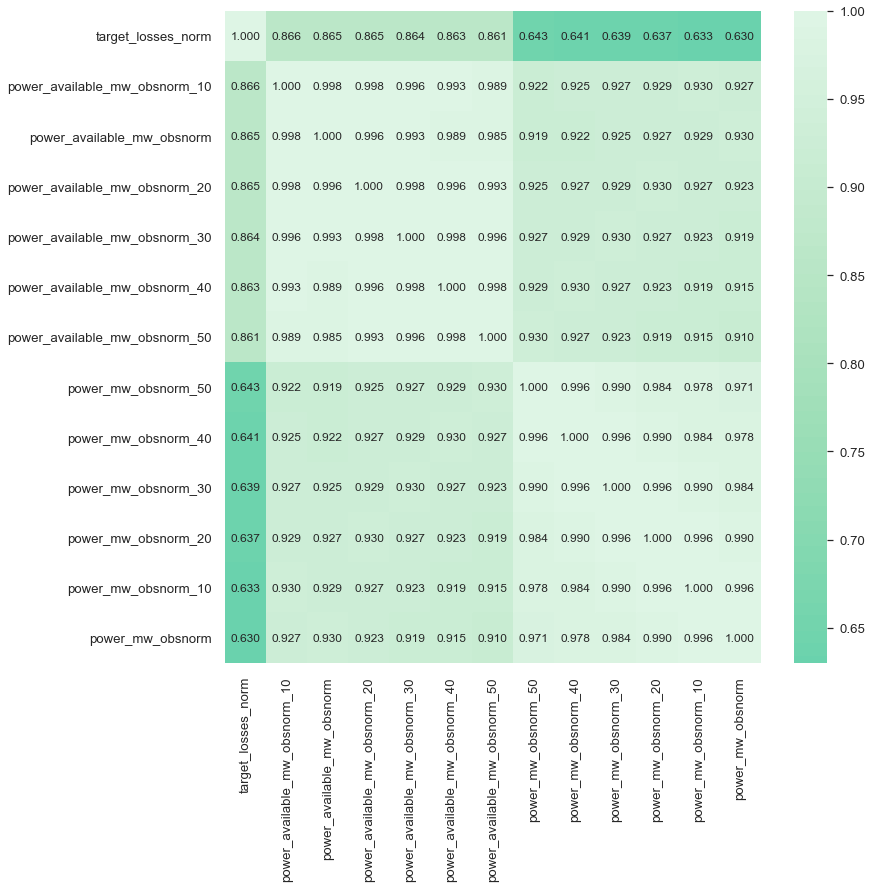

In [50]:
k = 15 #number of variables for heatmap
cols_corr_mat = np.abs(heatmap.corr()).nlargest(k, 'target_losses_norm')['target_losses_norm'].index
cm = np.corrcoef(heatmap[cols_corr_mat].dropna().values.T)
sns.set(font_scale=1.2)
plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm, annot=True, fmt='.3f', annot_kws={'size': 12},
                 yticklabels=cols_corr_mat.values, xticklabels=cols_corr_mat.values, cmap='mako', center=0.0)
plt.show()

**Observations:**  

- the difference in correlation for the last observed values and the 6 lagged value is insignificant
- the columns power_mw_obsnorm and power_available_mw_obsnorm do not carry additional information, since the difference between them creates our target value

## Dropping irrelevant columns

After thoroughly discussing the different features and examining their correlations with the target and inbetween themselves, we will drop some of them to speed up future models.

In [51]:

print('Number of columns BEFORE dropping:', len(df.columns))
print()

drop_lst = []
drop_lst.append("power_available_mw_obsnorm")   # information is implied in target_losses_norm
drop_lst.append("power_mw_obsnorm")             # information is implied in target_losses_norm
drop_lst.append("year")                         # no valuable information (not enough years)
drop_lst.append("pottemp_80mto0m_K")            # temperature difference will be included in keeping values on 2m and 100m
drop_lst.append("wdir_pl925_dn")                # will keep direction in 10m and 100m height
drop_lst.append("wdir_pl925_dn")                # will keep direction in 10m and 100m height
drop_lst.append("wdir_pfg30_dn")                # will keep direction in 10m and 100m height
drop_lst.append("t_pfg30_k")                    # will keep temperatures in 2m and 100m height
drop_lst.append("q_2m_1")                       # will keep relative humidity
drop_lst.append("q_pfg30_1")                    # will keep relative humidity
drop_lst.append("wsp_pl925_ms")                 # will keep wind speed in 10m and 100m height
drop_lst.append("wsp_pfg30_ms")                 # will keep wind speed in 10m and 100m height
drop_lst.append("Date")                         # information will be stored in month, weekday, hour, minute
drop_lst.append("day")                          # information will be stored in month, weekday, hour, minute

# dropping the columns
df.drop(columns = drop_lst, inplace = True)

print()
print('Number of remaining Columns AFTER dropping:', len(df.columns))
print(list(df.columns))



df.head(2)

Number of columns BEFORE dropping: 37


Number of remaining Columns AFTER dropping: 24
['target_losses_norm', 'dswrf_sfc_wm2', 'gust_sfc_ms', 'hpbl_sfc_m', 'msl_ms_pa', 'r_pl925_perc', 'r_pl950_perc', 'shtfl_sfc_wm2', 't_100m_k', 't_2m_k', 'tcclow_sfc_perc', 'tccmedium_sfc_perc', 'wdir_100m_dn', 'wdir_10m_dn', 'wsp_100m_ms', 'wsp_10m_ms', 'azimuth', 'elevation', 'month', 'hour', 'minute', 'weekday', 'working_day', 'summer']


,target_losses_norm,dswrf_sfc_wm2,gust_sfc_ms,hpbl_sfc_m,msl_ms_pa,r_pl925_perc,r_pl950_perc,shtfl_sfc_wm2,t_100m_k,t_2m_k,tcclow_sfc_perc,tccmedium_sfc_perc,wdir_100m_dn,wdir_10m_dn,wsp_100m_ms,wsp_10m_ms,azimuth,elevation,month,hour,minute,weekday,working_day,summer
2018-01-01 06:00:00,0.425598,0.0,16.777032,1349.927656,99212.062500,89.975000,83.0750,-58.444885,280.079346,280.496348,99.375000,49.500000,54.455224,51.936818,16.548291,9.772748,111.880959,-12.132894,1,6,0,Monday,False,0
2018-01-01 06:10:00,0.404513,0.0,16.748651,1350.376965,99220.020833,89.854167,82.9375,-58.558706,280.057788,280.470277,99.354167,54.458333,55.784078,53.253883,16.589409,9.804977,113.717751,-10.743970,1,6,10,Monday,False,0


# Export of Data

The Exploratory Data Analysis ends at this point. The DataFrame (df) is organized and cleaned. For handeling and performance reasons, the Machine Learning part of this project will be continued in a another Jupyter Notebook. The interface between the Jupyter Notebooks will be given using a `.pkl`file. 

In [52]:
path = './data/df_for_model.pkl'
df.to_pickle(path)

In [53]:
from pathlib import Path
Path(path).is_file()

True